<a href="https://colab.research.google.com/github/shubhampoonia/shubhampoonia.github.io/blob/master/AKTU%20final%20year%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary packages**

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image, ImageOps
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


# **Importing Pretained Model**

In [2]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the inception model and discards the last 1000 neuron layer.



/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
tf.keras.layers.Dropout(0.8)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation\


In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [0]:
for layer in model.layers[:20]: #freezing top 20 layers
    layer.trainable=False
for layer in model.layers[20:]:  
    layer.trainable=True

# Preprocessing data using keras ImageDataGenerator function

In [0]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)



In [7]:
train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/data/train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 shuffle=False ,
                                                 class_mode='categorical',
                                                 )
val_dataset=valid_datagen.flow_from_directory('/content/drive/My Drive/data/validation/', # this is where you specify the path to the validation folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 shuffle=False, 
                                              class_mode='categorical'
                                                 )


Found 160 images belonging to 3 classes.
Found 160 images belonging to 3 classes.


# Compiling model 


In [0]:

model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be Categorical accuracy



# Training model

In [9]:
step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=40,
                  validation_data=val_dataset) 
                    

Epoch 1/40
5/5 [==============================] - 8s 2s/step - loss: 6.1499 - categorical_accuracy: 0.2486 - val_loss: 2.6643 - val_categorical_accuracy: 0.1574
Epoch 2/40
5/5 [==============================] - 2s 336ms/step - loss: 1.5580 - categorical_accuracy: 0.1832 - val_loss: 0.9824 - val_categorical_accuracy: 0.1615
Epoch 3/40
5/5 [==============================] - 2s 338ms/step - loss: 1.1662 - categorical_accuracy: 0.1638 - val_loss: 1.3016 - val_categorical_accuracy: 0.1779
Epoch 4/40
5/5 [==============================] - 2s 345ms/step - loss: 1.1259 - categorical_accuracy: 0.1851 - val_loss: 1.2788 - val_categorical_accuracy: 0.1820
Epoch 5/40
5/5 [==============================] - 2s 350ms/step - loss: 1.1174 - categorical_accuracy: 0.1779 - val_loss: 0.1786 - val_categorical_accuracy: 0.2285
Epoch 6/40
5/5 [==============================] - 2s 354ms/step - loss: 1.0831 - categorical_accuracy: 0.2639 - val_loss: 0.1033 - val_categorical_accuracy: 0.3008
Epoch 7/40
5/5 [===

In [10]:
results = model.evaluate_generator(val_dataset)
print('test loss, test acc:', results)

test loss, test acc: [0.48421263694763184, 0.7179571390151978]


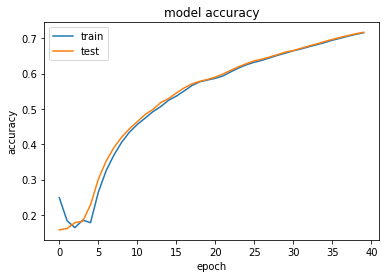

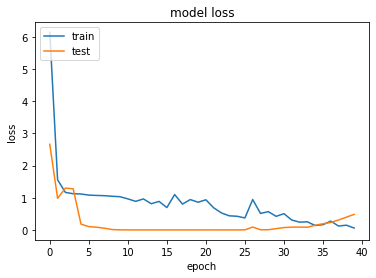

In [11]:
# summarize history for accuracy 
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Pre-processing data which is to be predicted**

In [0]:

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('/content/drive/My Drive/data/validation/malignant/mdb023.jpg')

#resize the image to a 224x224:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)


In [0]:
image=image.convert('RGB')

In [14]:
image.size

(224, 224)

In [0]:
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1


In [0]:
data[0] = normalized_image_array


# Prediction of the model

1.  **negative** 
2.  **positive**



In [17]:
# run the inference
prediction = model.predict(data)

print(prediction)

[[2.9936669e-02 2.0590524e-07 9.7006309e-01]]
